In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Understanding

In [2]:
df = pd.read_csv('../data/heart_disease_uci.csv', index_col = 'id')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


(920, 15)

In [3]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.0,47.0,54.0,60.0,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.0,130.0,140.0,200.0
chol,890.0,199.130337,110.780810,0.0,175.0,223.0,268.0,603.0
thalch,865.0,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.0,0.5,1.5,6.2
ca,309.0,0.676375,0.935653,0.0,0.0,0.0,1.0,3.0
num,920.0,0.995652,1.142693,0.0,0.0,1.0,2.0,4.0


In [5]:
print(df.columns)
print(len(df.columns))

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
15


In [6]:
df.rename(columns={
    'cp': 'chest_pain_type',
    'trestbps': 'blood_pressure_resting',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'ecg_resting',
    'thalch': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression_exercise',
    'slope': 'st_slope_type',
    'ca': 'major_vessels_colored',
    'thal': 'thal_defect_type',
    'num': 'heart_disease_prediction'
}, inplace=True)
df.columns

Index(['age', 'sex', 'dataset', 'chest_pain_type', 'blood_pressure_resting',
       'cholesterol', 'fasting_blood_sugar', 'ecg_resting', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression_exercise', 'st_slope_type',
       'major_vessels_colored', 'thal_defect_type',
       'heart_disease_prediction'],
      dtype='object')

In [7]:
df.head()

,age,sex,dataset,chest_pain_type,blood_pressure_resting,cholesterol,fasting_blood_sugar,ecg_resting,max_heart_rate,exercise_induced_angina,st_depression_exercise,st_slope_type,major_vessels_colored,thal_defect_type,heart_disease_prediction
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Handle Missing data

In [8]:
df['cholesterol'] = df['cholesterol'].replace(0, np.nan)
df['blood_pressure_resting'] = df['blood_pressure_resting'].replace(0, np.nan)

In [9]:
# print(df.shape)
df['sick'] = (df['heart_disease_prediction'] != 0).astype(int)
clean_data = df.dropna()
clean_data.to_csv('../data/heart_disease_clean.csv')
# print(clean_data.shape)

## Data Visualization


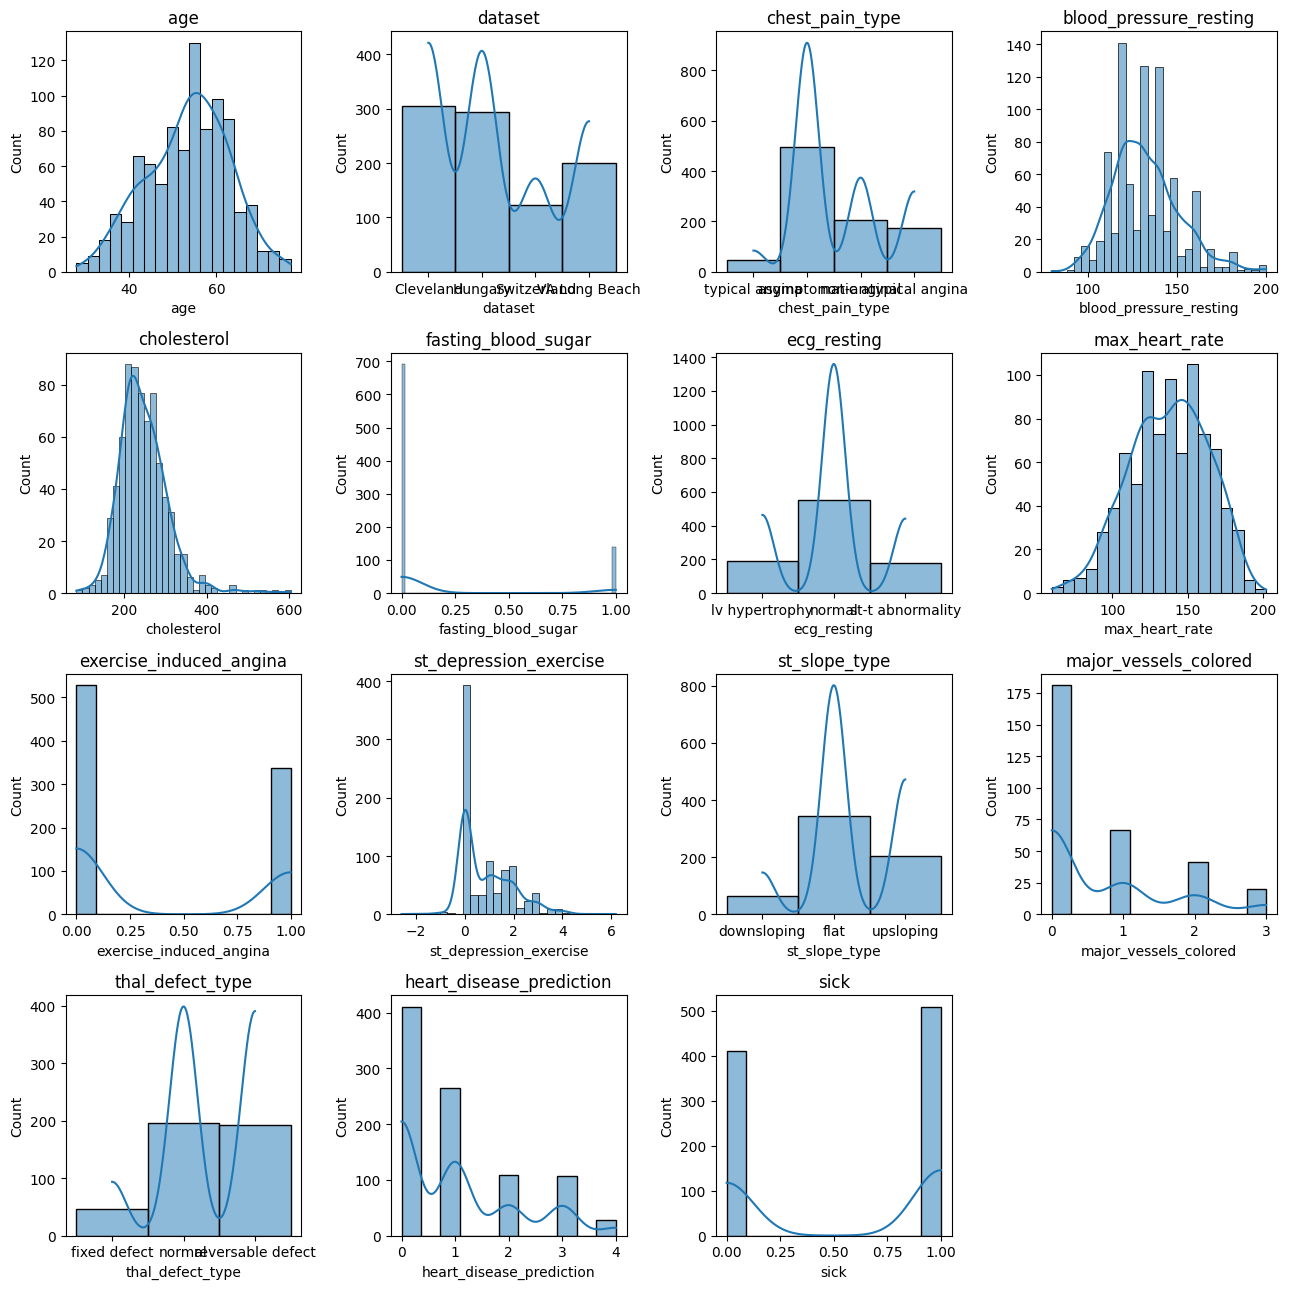

In [ ]:
plt.figure(figsize=(13, 13))

columns_to_plot = [col for col in df.columns if col not in ['id', 'sex']]

for i, col in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)
    sns.histplot(x=col, data=df, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


- Understanding age, sex and dataset columns

sex
Male      726
Female    194
Name: count, dtype: int64


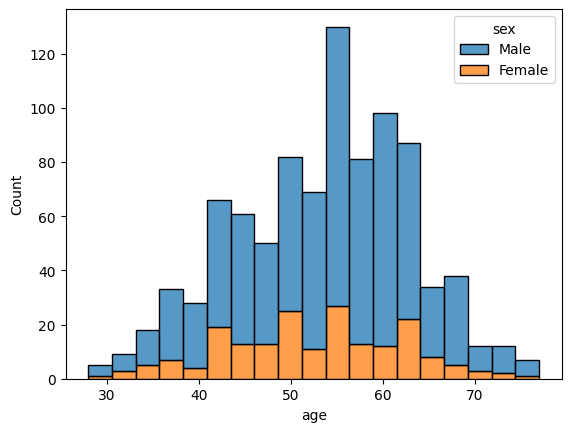

In [11]:
plt.figure()
sns.histplot(data=df, x='age', hue='sex', multiple='stack')  

sex_counts = df['sex'].value_counts()
print(sex_counts)

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


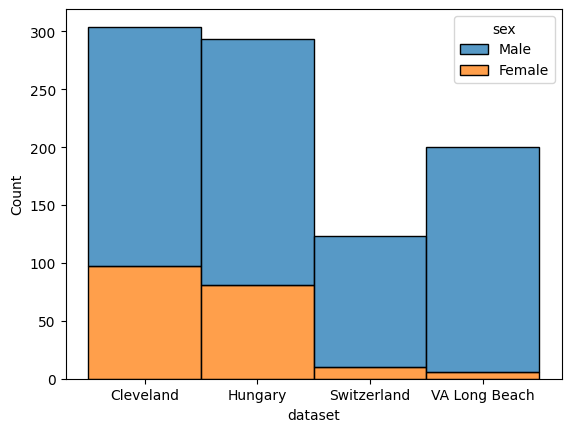

In [12]:
sns.histplot(data=df, x='dataset', hue='sex', multiple='stack')
print(df.groupby('sex')['dataset'].value_counts())


sex            Female  Male  sex_ratio
dataset                               
Cleveland          97   207   2.134021
Hungary            81   212   2.617284
Switzerland        10   113  11.300000
VA Long Beach       6   194  32.333333


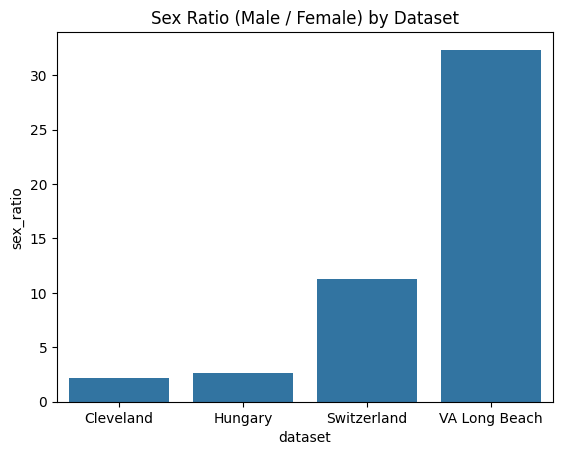

In [13]:
sex_ratio = df.groupby(['dataset', 'sex']).size().unstack().fillna(0)
sex_ratio['sex_ratio'] = sex_ratio['Male'] / sex_ratio['Female']
print(sex_ratio)
sns.barplot(data=sex_ratio.reset_index(), x='dataset', y='sex_ratio')
plt.title('Sex Ratio (Male / Female) by Dataset')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

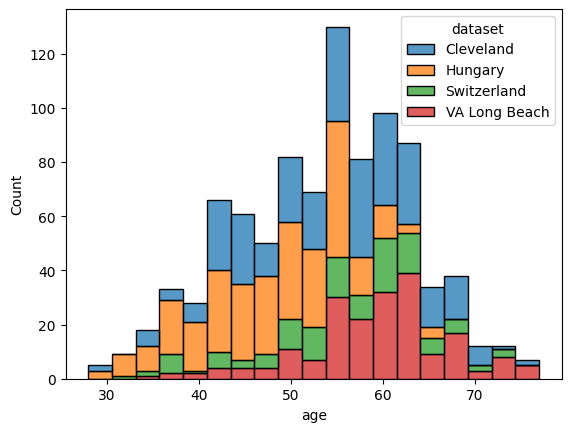

In [14]:
sns.histplot(data=df, x='age', hue='dataset', multiple='stack')

- Understanding the chest_pain_type (Chest Pain) Column


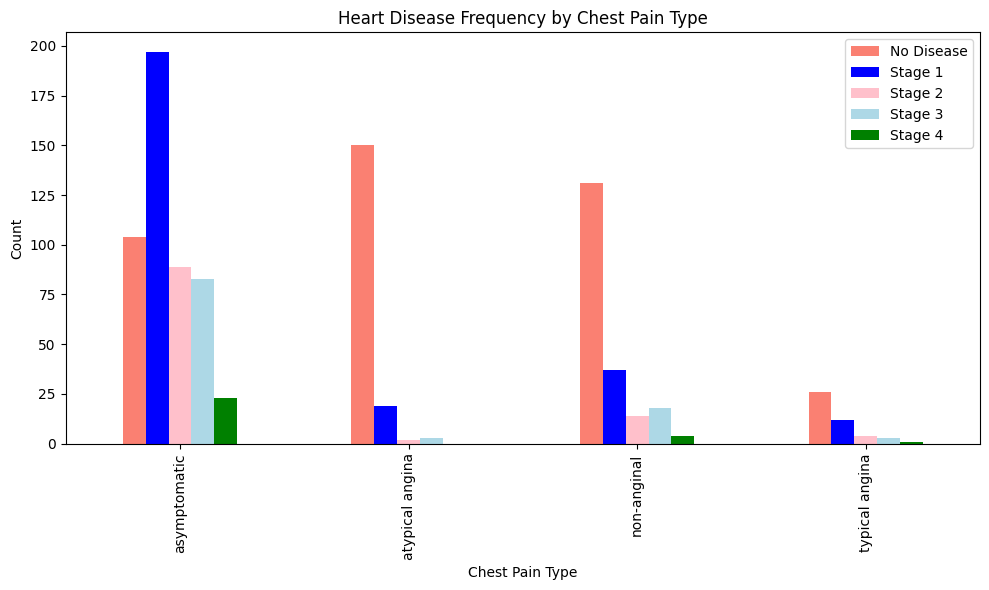

In [15]:
df['chest_pain_type'].value_counts()
pd.crosstab(df.chest_pain_type, df.heart_disease_prediction).plot(kind="bar", figsize=(10, 6),
    color=['salmon', 'blue', 'pink', 'lightblue', 'green'])
plt.title('Heart Disease Frequency by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
plt.tight_layout()
plt.show()


<Axes: xlabel='chest_pain_type', ylabel='Count'>

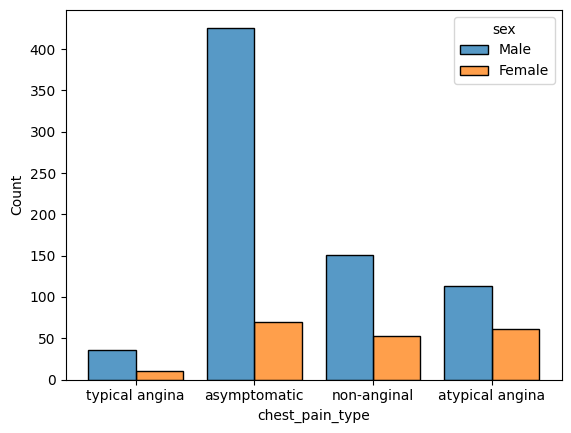

In [16]:
sns.histplot(data=df, x='chest_pain_type', hue='sex', multiple='dodge', shrink=0.8)

La figura sopra potrebbe portare a conclusioni fuorvianti, data la distribuzione non uniforme dei sessi nel dataset. Creo quindi un grafico normalizzato.

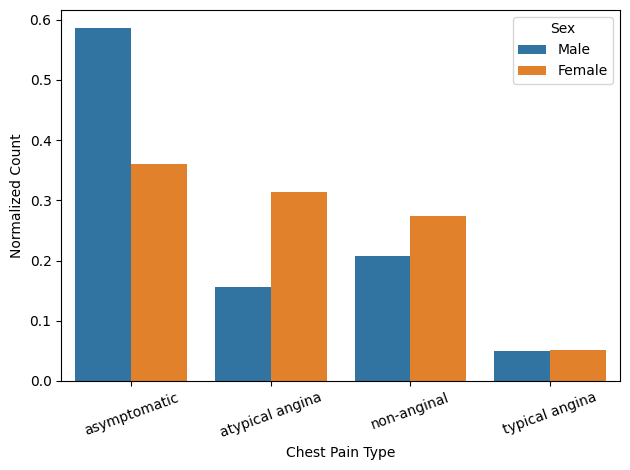

In [17]:
sex_counts = df['sex'].value_counts()
cp_sex_counts = df.groupby(['chest_pain_type', 'sex']).size().unstack(fill_value=0)
cp_sex_counts['Male_Proportion'] = cp_sex_counts['Male'] / sex_counts['Male']
cp_sex_counts['Female_Proportion'] = cp_sex_counts['Female'] / sex_counts['Female']
df_prop = cp_sex_counts.reset_index()
df_prop_melt = df_prop.melt(id_vars='chest_pain_type', value_vars=['Male_Proportion', 'Female_Proportion'],
                            var_name='Sex', value_name='Proportion')
df_prop_melt['Sex'] = df_prop_melt['Sex'].str.replace('_Proportion', '')
sns.barplot(data=df_prop_melt, x='chest_pain_type', y='Proportion', hue='Sex')
plt.ylabel('Normalized Count')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

<Axes: xlabel='chest_pain_type', ylabel='count'>

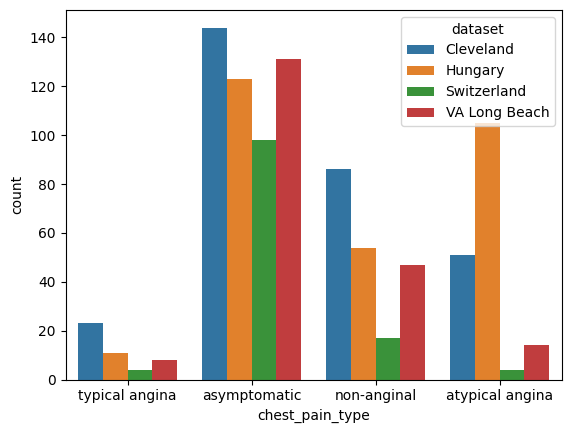

In [18]:
sns.countplot(df, x='chest_pain_type', hue='dataset')


Anche questo grafico potrebbe portare a conclusioni sbagliate, essendo i dati non normalizzati

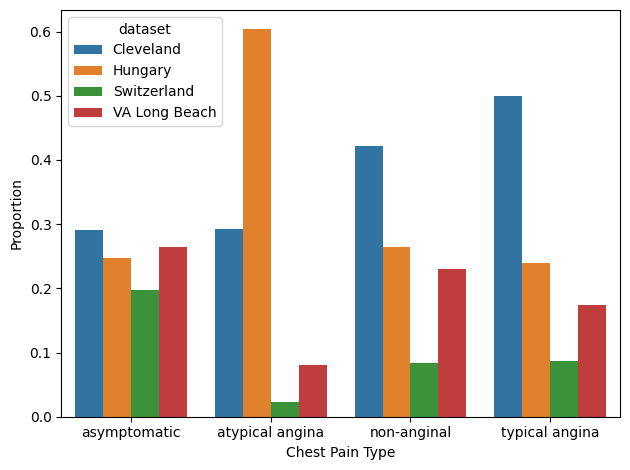

In [19]:
cp_normalized = df.groupby(['chest_pain_type', 'dataset']).size().unstack(fill_value=0)
cp_normalized = cp_normalized.div(cp_normalized.sum(axis=1), axis=0)
cp_normalized = cp_normalized.reset_index().melt(id_vars='chest_pain_type', var_name='dataset', value_name='Proportion')
sns.barplot(data=cp_normalized, x='chest_pain_type', y='Proportion', hue='dataset')
plt.ylabel('Proportion')
plt.xlabel('Chest Pain Type')
plt.tight_layout()
plt.show()


<Axes: xlabel='age', ylabel='Count'>

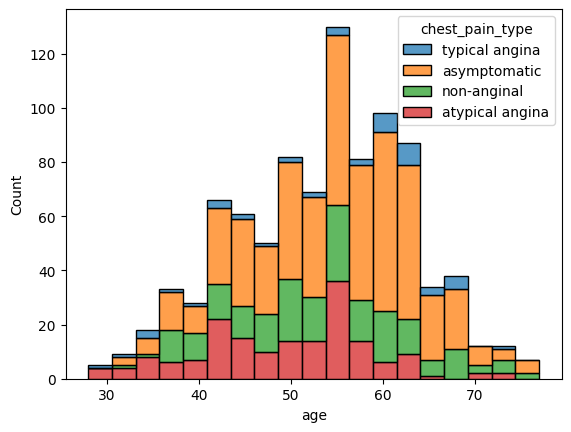

In [20]:
sns.histplot(df, x='age', hue='chest_pain_type', multiple='stack')


- Studio della colonna blood_pressure_resting  (resting blood pressure) 

count    860.000000
mean     132.286047
std       18.536175
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: blood_pressure_resting, dtype: float64


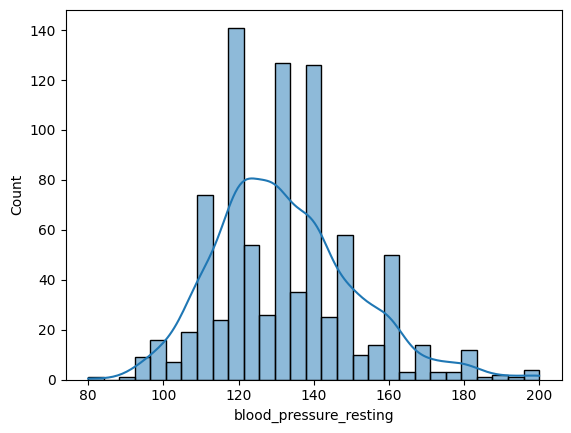

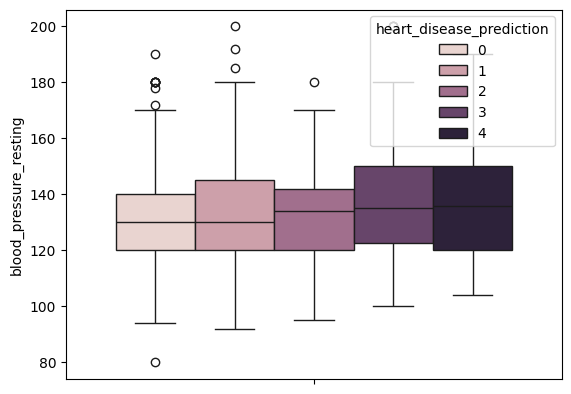

In [21]:
print(df['blood_pressure_resting'].describe())
sns.histplot(df['blood_pressure_resting'], kde=True)
plt.show()
sns.boxplot(y='blood_pressure_resting', hue='heart_disease_prediction', data=df)
plt.show()

- Studio della colonna cholesterol (cholesterolesterol level)

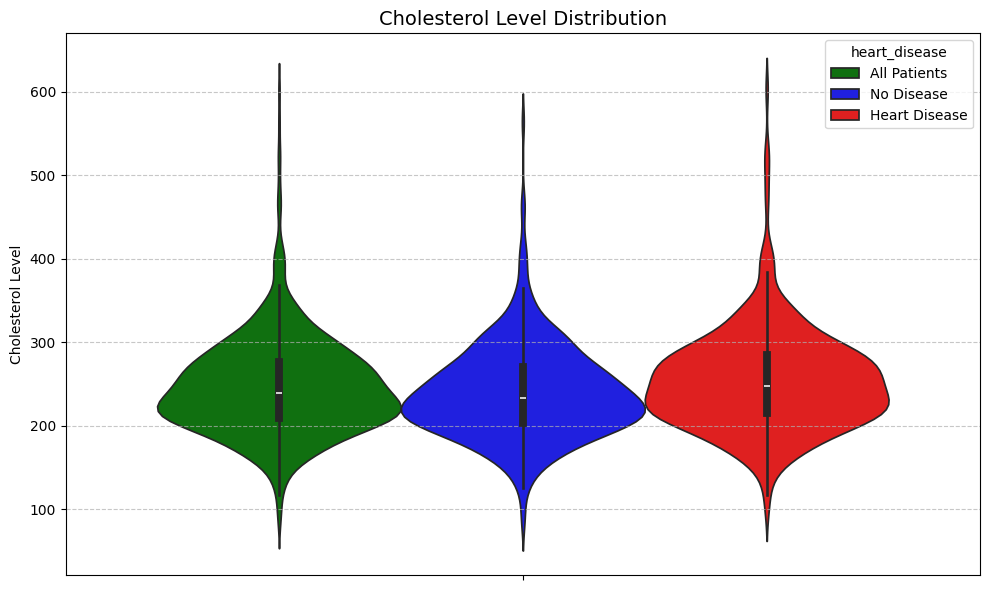

In [22]:
df_labeled = df.copy()
df_labeled['heart_disease'] = df_labeled['heart_disease_prediction'].apply(
    lambda x: 'No Disease' if x == 0 else 'Heart Disease'
)
df_all = df.copy()
df_all['heart_disease'] = 'All Patients'
df_combined = pd.concat([df_all, df_labeled], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_combined, hue='heart_disease', y='cholesterol', palette={
    'All Patients': 'green',
    'No Disease': 'blue',
    'Heart Disease': 'red'
})
plt.title('Cholesterol Level Distribution', fontsize=14)
plt.ylabel('Cholesterol Level')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Studio della colonna thal (thalismia)

<Axes: xlabel='age', ylabel='Count'>

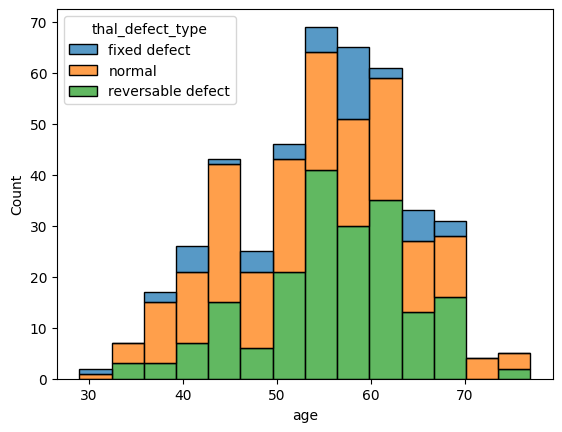

In [23]:
sns.histplot(df, x='age', hue='thal_defect_type', multiple='stack')


thal_defect_type   chest_pain_type
fixed defect       asymptomatic        32
                   non-anginal          8
                   atypical angina      3
                   typical angina       3
normal             non-anginal         72
                   asymptomatic        68
                   atypical angina     41
                   typical angina      15
reversable defect  asymptomatic       139
                   non-anginal         32
                   atypical angina     13
                   typical angina       8
Name: count, dtype: int64


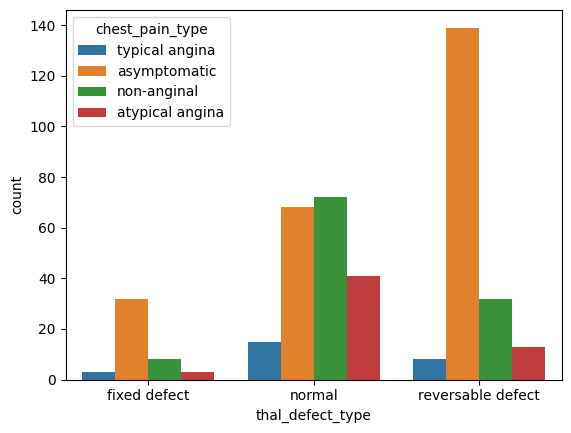

In [24]:
print(df.groupby('thal_defect_type')['chest_pain_type'].value_counts())
sns.countplot(data=df, x='thal_defect_type', hue='chest_pain_type')
plt.show()

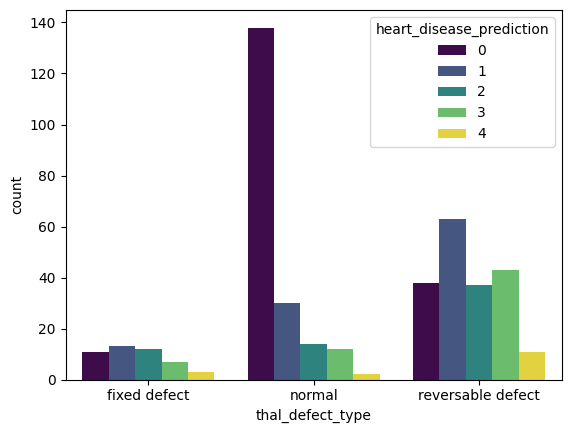

In [25]:
df.groupby('thal_defect_type')['heart_disease_prediction'].value_counts()
# Plot to Visualize
sns.countplot(df, x='thal_defect_type', hue='heart_disease_prediction' , palette='viridis')
plt.show()

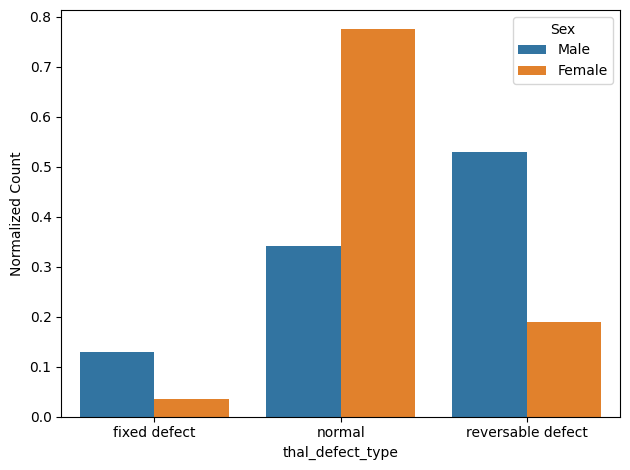

In [26]:
num_males_thal = df[df['sex'] == 'Male']['thal_defect_type'].notnull().sum()
num_females_thal = df[df['sex'] == 'Female']['thal_defect_type'].notnull().sum()
thal_sex_counts = df.groupby(['thal_defect_type', 'sex']).size().unstack(fill_value=0)
thal_sex_counts['Male_Proportion'] = thal_sex_counts['Male'] / num_males_thal
thal_sex_counts['Female_Proportion'] = thal_sex_counts['Female'] / num_females_thal

df_prop = thal_sex_counts.reset_index()
df_prop_melt = df_prop.melt(id_vars='thal_defect_type', value_vars=['Male_Proportion', 'Female_Proportion'],
                            var_name='Sex', value_name='Proportion')
df_prop_melt['Sex'] = df_prop_melt['Sex'].str.replace('_Proportion', '')
sns.barplot(data=df_prop_melt, x='thal_defect_type', y='Proportion', hue='Sex')
plt.ylabel('Normalized Count')
plt.tight_layout()
plt.show()

- Esplorazione di num

heart_disease_prediction  sex   
0                         Male      267
                          Female    144
1                         Male      235
                          Female     30
2                         Male       99
                          Female     10
3                         Male       99
                          Female      8
4                         Male       26
                          Female      2
Name: count, dtype: int64


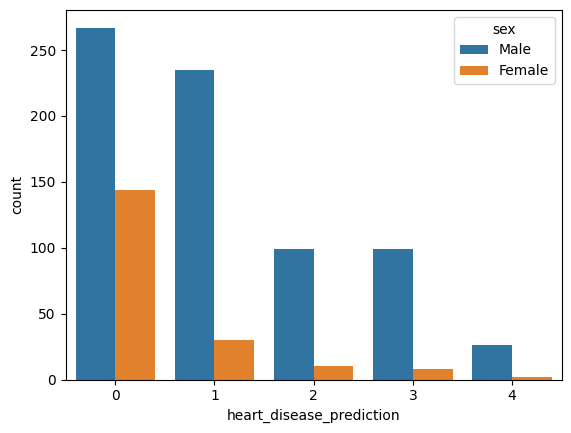

In [27]:
print(df.groupby('heart_disease_prediction')['sex'].value_counts())
sns.countplot(df, x='heart_disease_prediction', hue='sex')
plt.show()

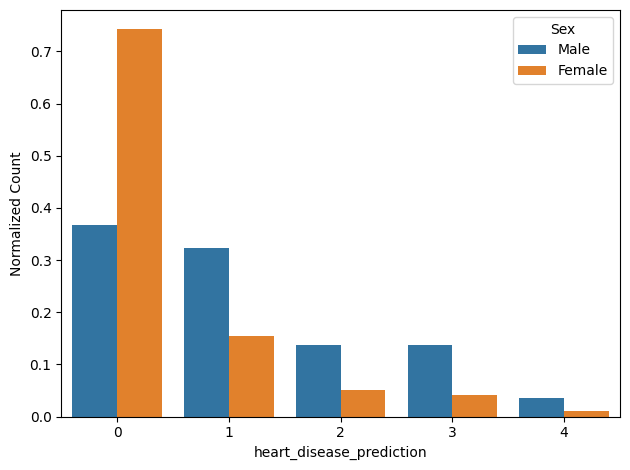

In [28]:
num_males = df[df['sex'] == 'Male']['heart_disease_prediction'].notnull().sum()
num_females = df[df['sex'] == 'Female']['heart_disease_prediction'].notnull().sum()
hd_sex_counts = df.groupby(['heart_disease_prediction', 'sex']).size().unstack(fill_value=0)
hd_sex_counts['Male_Proportion'] = hd_sex_counts['Male'] / num_males
hd_sex_counts['Female_Proportion'] = hd_sex_counts['Female'] / num_females

df_prop = hd_sex_counts.reset_index()
df_prop_melt = df_prop.melt(id_vars='heart_disease_prediction',
                            value_vars=['Male_Proportion', 'Female_Proportion'],
                            var_name='Sex', value_name='Proportion')
df_prop_melt['Sex'] = df_prop_melt['Sex'].str.replace('_Proportion', '')
sns.barplot(data=df_prop_melt, x='heart_disease_prediction', y='Proportion', hue='Sex')
plt.ylabel('Normalized Count')
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

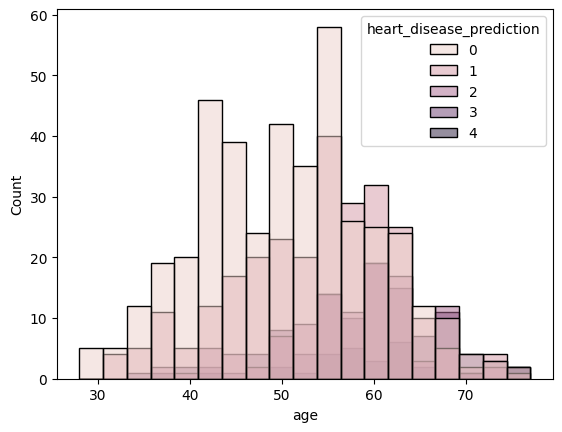

In [29]:
sns.histplot(df, x='age', hue='heart_disease_prediction')

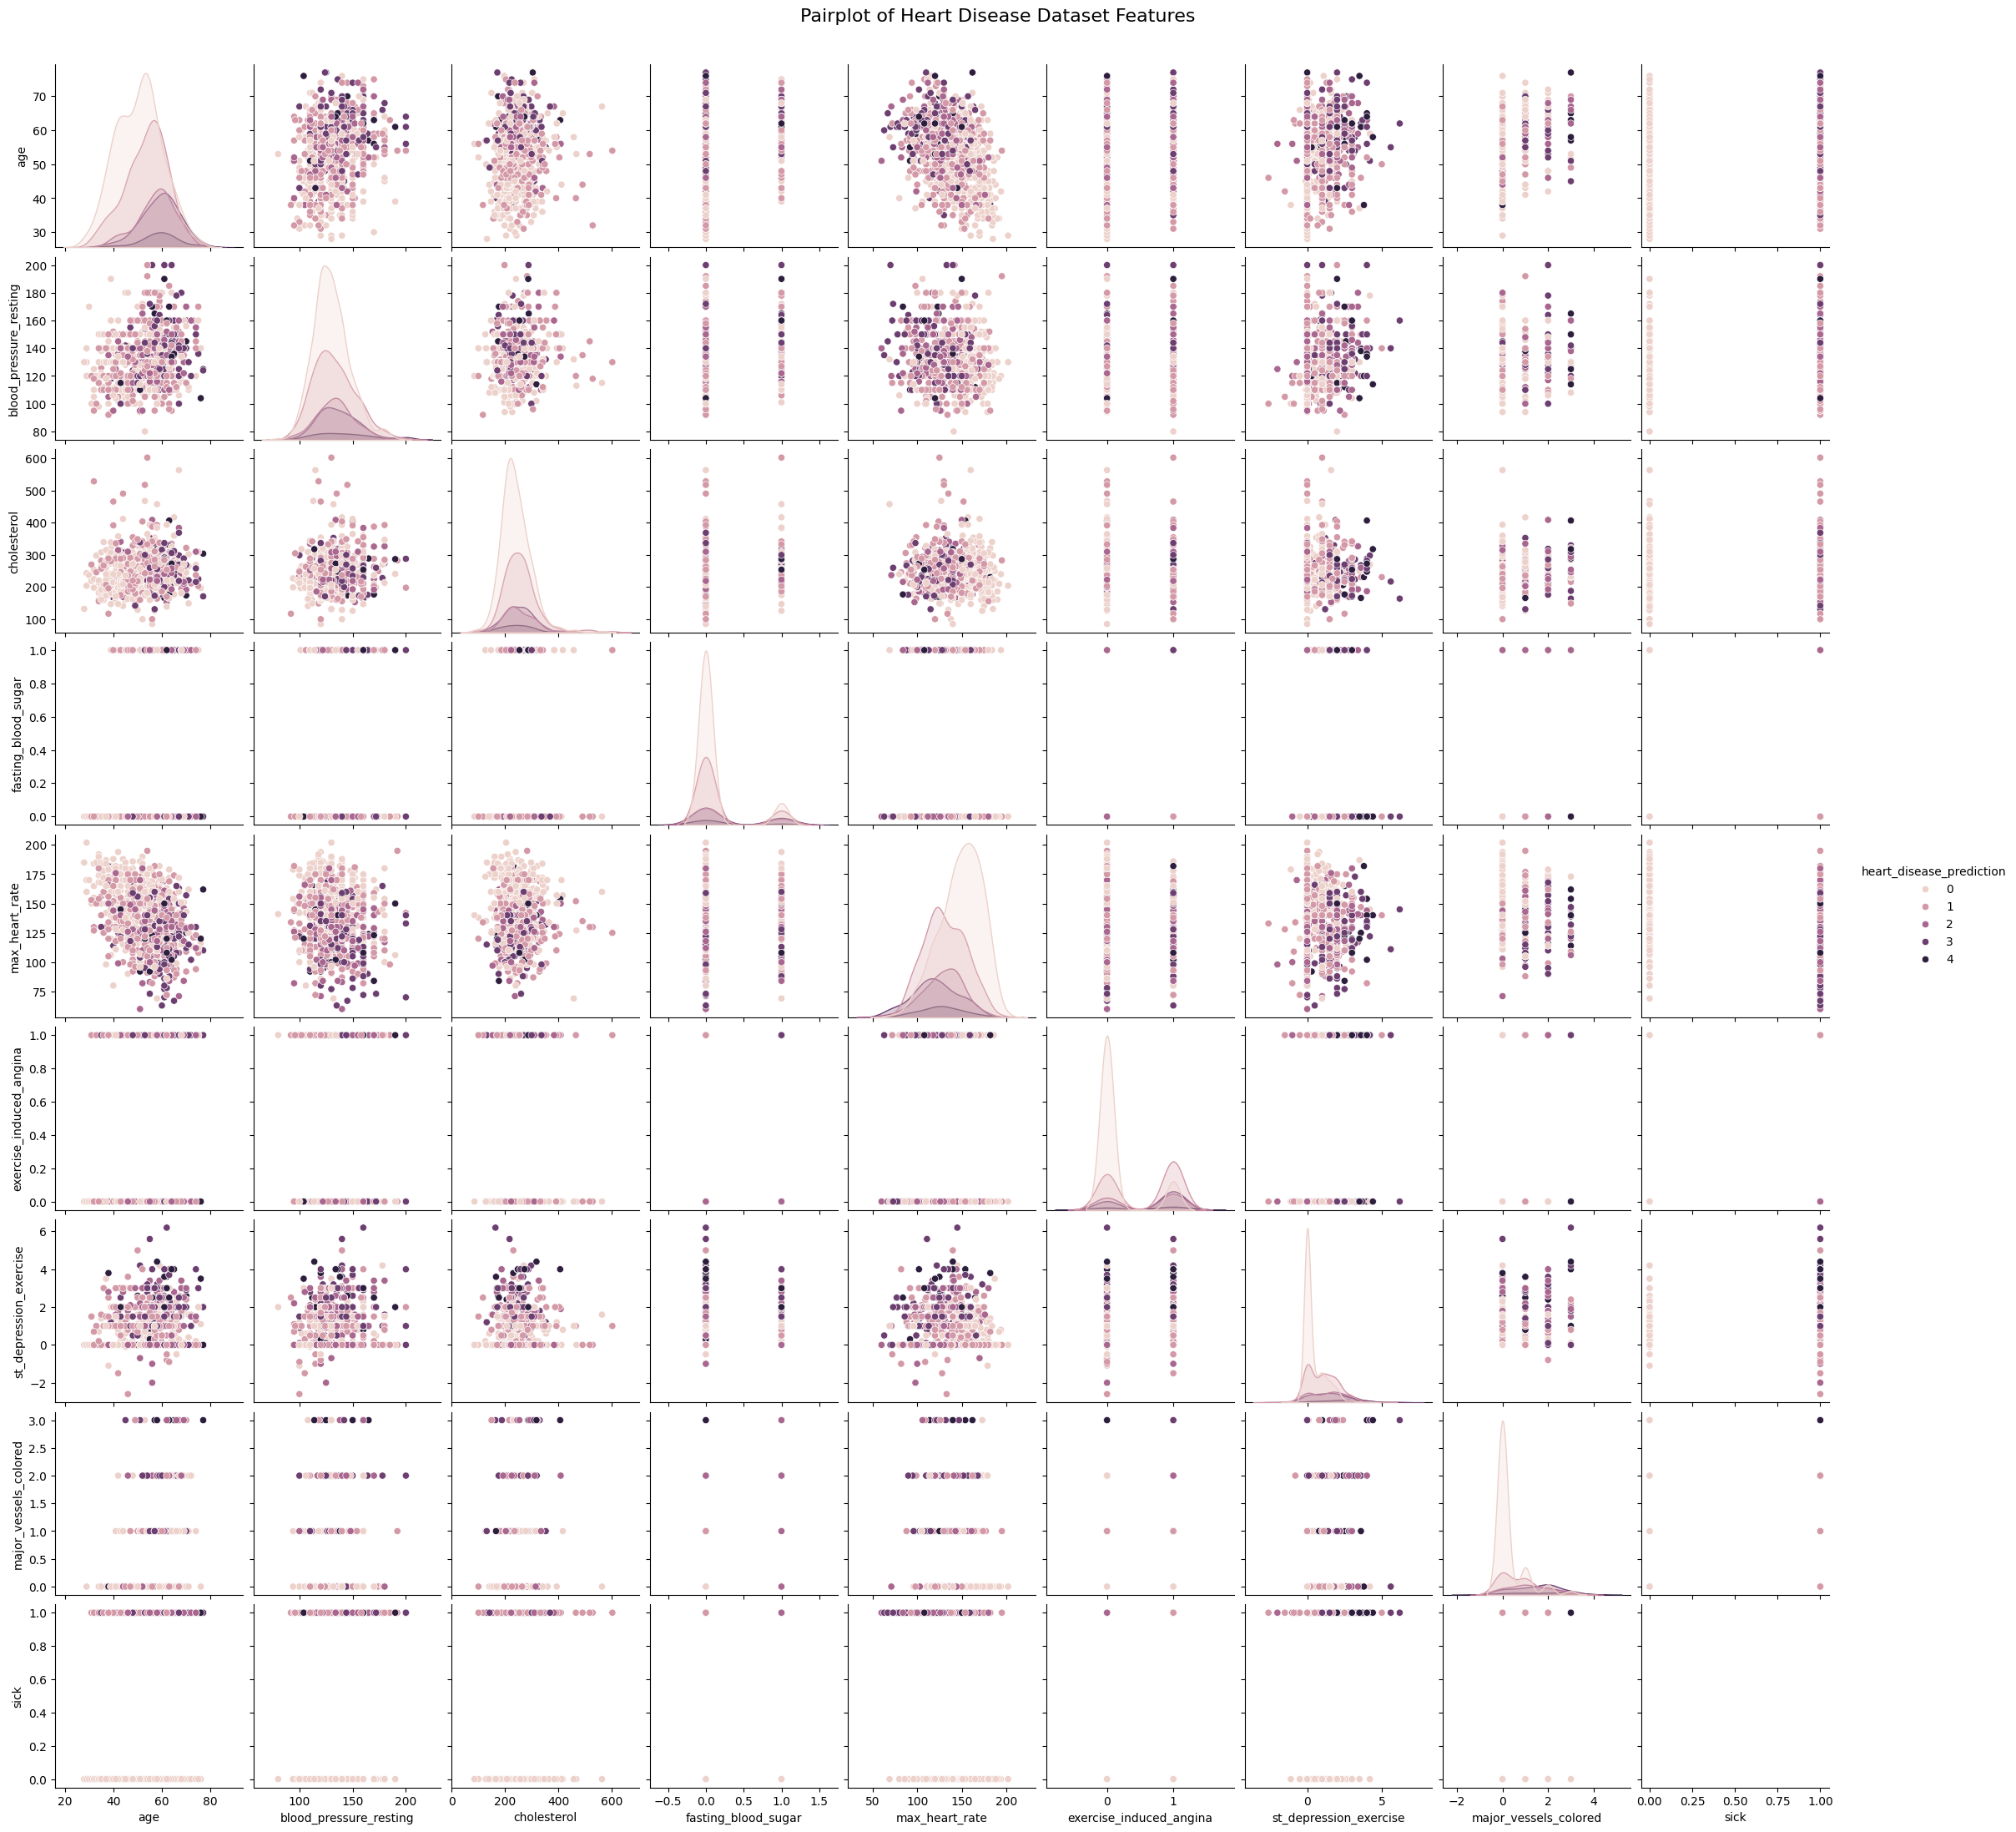

In [30]:
pairplot = sns.pairplot(data=df, hue='heart_disease_prediction')
pairplot.figure.suptitle('Pairplot of Heart Disease Dataset Features', fontsize=16)
pairplot.figure.subplots_adjust(top=0.95)
plt.show()

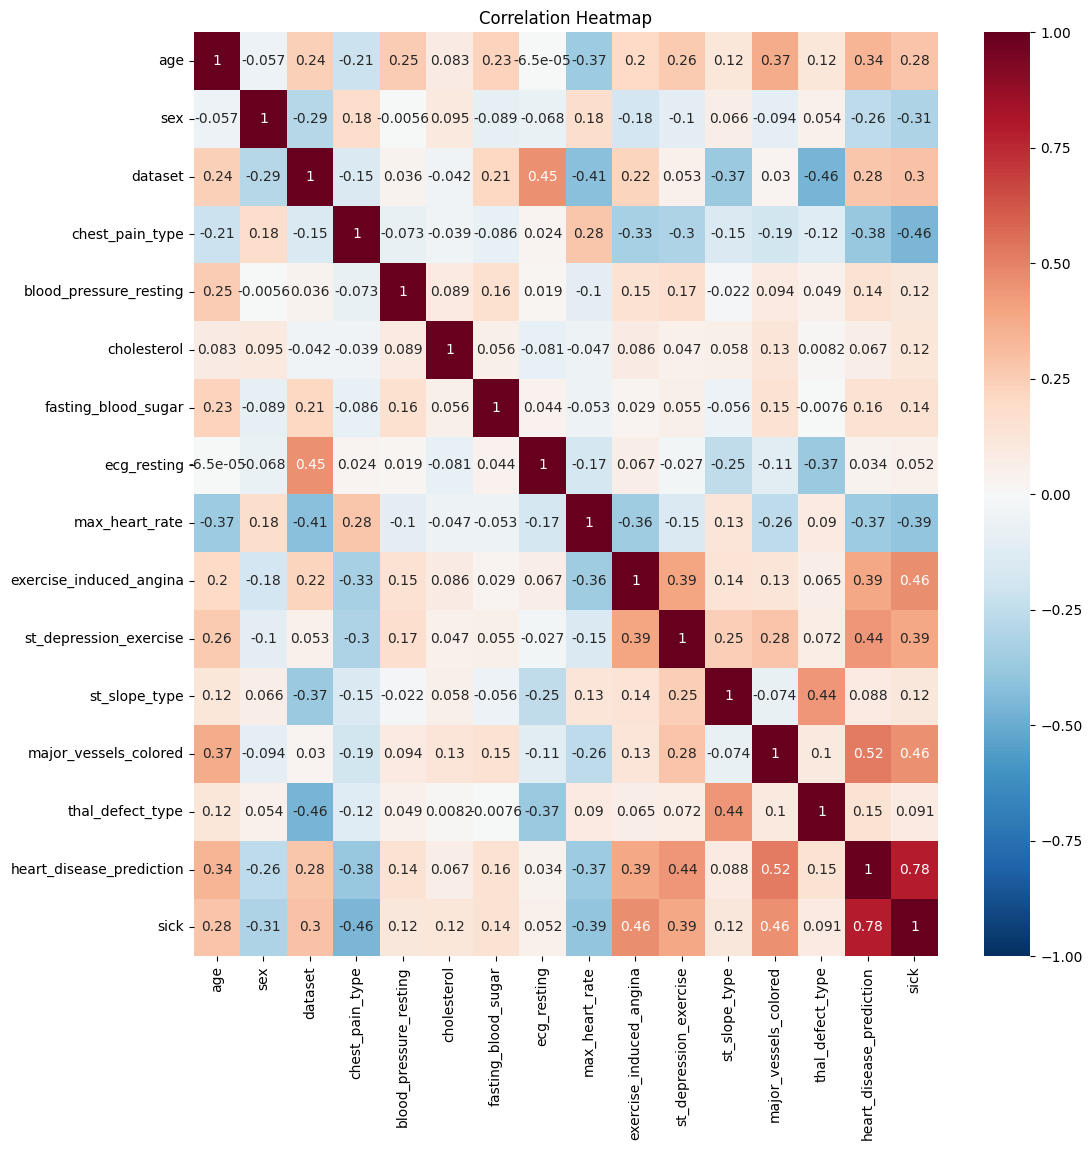

In [31]:
df_encoded = df.copy()
for col in ['sex', 'dataset', 'chest_pain_type', 'ecg_resting', 'st_slope_type', 'thal_defect_type']:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

plt.figure(figsize=(12, 12))
sns.heatmap(df_encoded.corr(), vmin=-1.0, center=0, cmap='RdBu_r', annot=True)
plt.title('Correlation Heatmap')
plt.show()